In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE, MDS


In [5]:
# Load the iris dataset
iris = load_iris()
X = iris.data        # Feature data
y = iris.target      # Class labels
target_names = iris.target_names

# Standardize the data for better performance of the algorithms
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [6]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)


In [7]:
# Linear Discriminant Analysis (LDA)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y)


In [8]:
# t-Distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)


c:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

In [9]:
# Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_std)


In [10]:
# Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_std)


In [13]:
# Function to plot the reduced dimensions
def plot_embedding(ax, X_emb, title):
    scatter = ax.scatter(X_emb[:, 0], X_emb[:, 1], c=y, cmap='viridis',
                         edgecolor='k', s=50)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Component 1', fontsize=12)
    ax.set_ylabel('Component 2', fontsize=12)
    
    # Manually create the legend using unique class labels
    unique_classes = np.unique(y)
    legend_labels = [target_names[i] for i in unique_classes]
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
               for i in unique_classes]
    
    ax.legend(handles, legend_labels, title="Classes", loc="best")


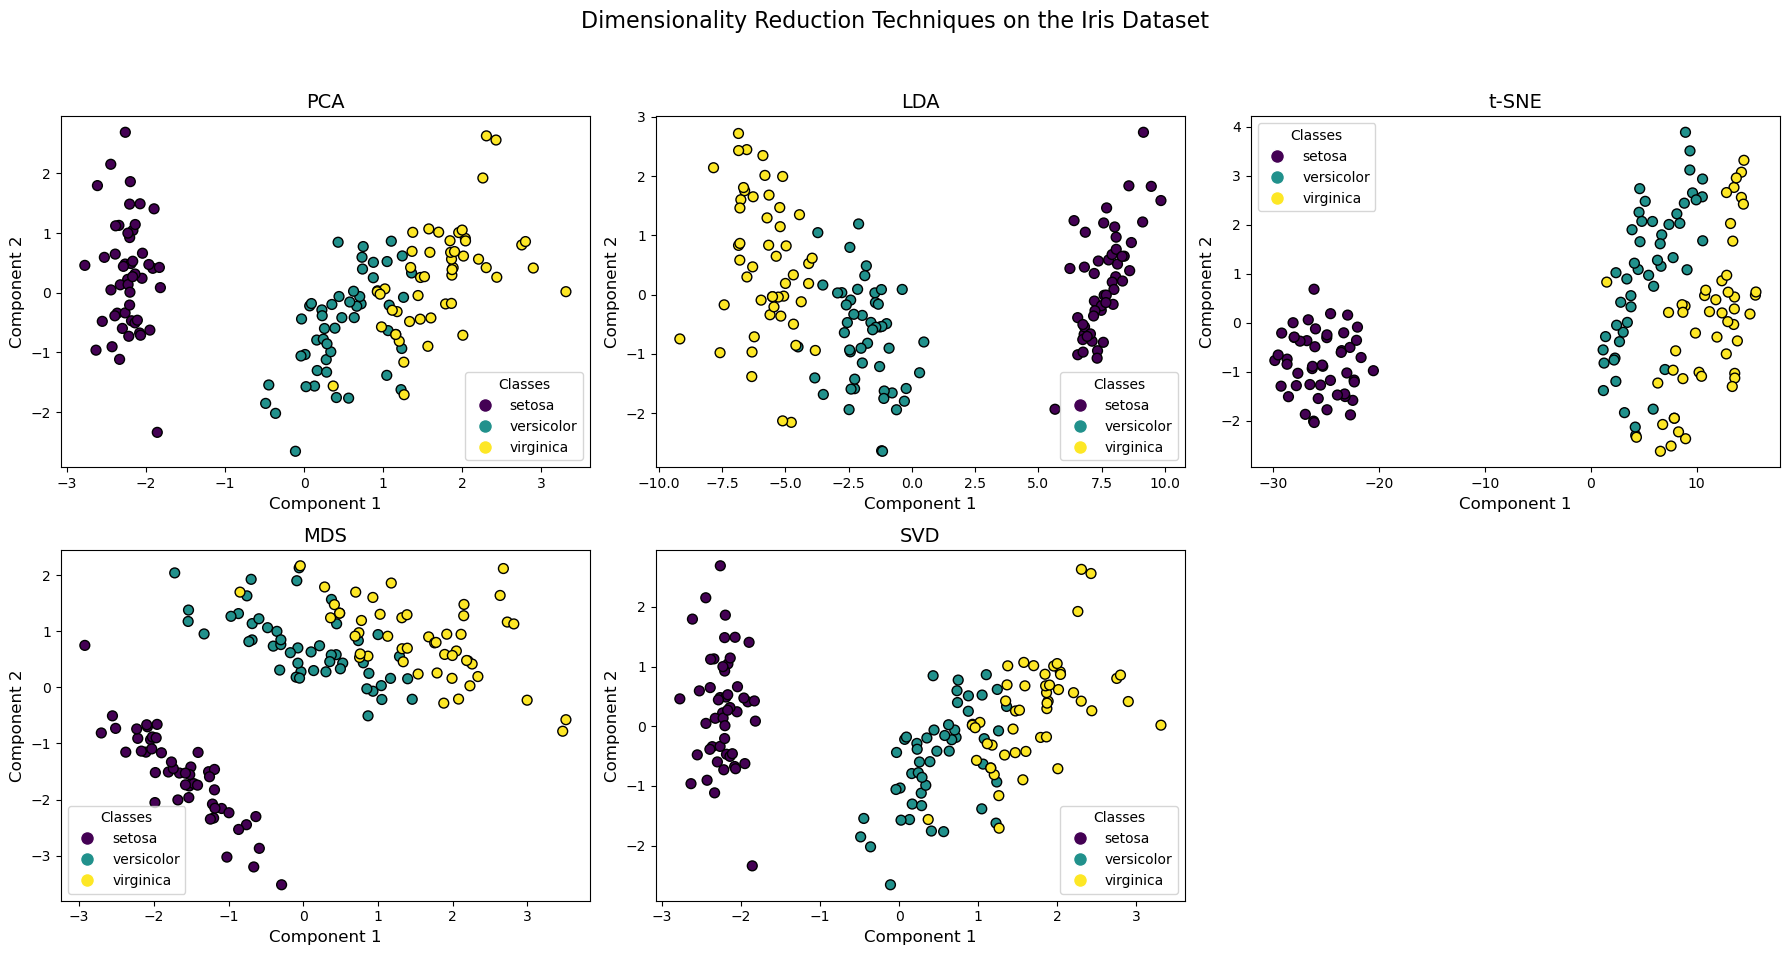

In [14]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()  # Flatten to easily iterate over subplots

# Plot each technique's output
plot_embedding(axs[0], X_pca, 'PCA')
plot_embedding(axs[1], X_lda, 'LDA')
plot_embedding(axs[2], X_tsne, 't-SNE')
plot_embedding(axs[3], X_mds, 'MDS')
plot_embedding(axs[4], X_svd, 'SVD')

# Remove the empty subplot
fig.delaxes(axs[5])

# Add a super title and adjust layout
plt.suptitle('Dimensionality Reduction Techniques on the Iris Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
